In [49]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import pandas as pd
from scipy.stats import linregress, ttest_ind, chi2_contingency, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [50]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate the dataset
data = {
    # Continuous variables for t-test/ANOVA
    "session_duration": np.random.normal(loc=300, scale=50, size=1000),
    "pages_viewed": np.random.poisson(lam=5, size=1000),
    "purchase_amount": np.random.normal(loc=50, scale=10, size=1000),  # Simulated purchase amounts

    # Categorical variables for chi-square tests
    "device": np.random.choice(["mobile", "desktop", "tablet"], size=1000, p=[0.6, 0.3, 0.1]),
    "source": np.random.choice(["organic", "paid", "referral", "direct"], size=1000, p=[0.4, 0.3, 0.2, 0.1]),
    "location": np.random.choice(["US", "EU", "APAC", "LATAM"], size=1000, p=[0.5, 0.2, 0.2, 0.1]),

    # Binary variable for A/B testing
    "group": np.random.choice(["control", "treatment"], size=1000, p=[0.5, 0.5]),
    "converted": np.random.choice([0, 1], size=1000, p=[0.85, 0.15]),

    # Ordinal variable for Bayesian analysis
    "customer_segment": np.random.choice(["low", "medium", "high"], size=1000, p=[0.5, 0.3, 0.2]),

    # Explanatory variable for Bayesian or regression analysis
    "ad_spend": np.random.uniform(50, 500, size=1000),  # Ad spend per session
}

# Create the DataFrame
df = pd.DataFrame(data)

# Add calculated variables
# Higher conversion likelihood for "treatment" group
df.loc[df["group"] == "treatment", "converted"] = np.random.choice([0, 1], size=len(df[df["group"] == "treatment"]), p=[0.7, 0.3])

# Simulate higher purchase amounts for converted users
df.loc[df["converted"] == 1, "purchase_amount"] += np.random.normal(loc=10, scale=5, size=len(df[df["converted"] == 1]))

# Save the dataset
df.to_csv("Resources/enhanced_cro_data.csv", index=False)

print("Enhanced dataset generated and saved as 'enhanced_cro_data.csv'")


Enhanced dataset generated and saved as 'enhanced_cro_data.csv'


In [51]:
# t-Test: Compare session_duration or purchase_amount between control and treatment groups

# Separate data into groups
control = df[df["group"] == "control"]["purchase_amount"]
treatment = df[df["group"] == "treatment"]["purchase_amount"]

# Perform independent t-test
t_stat, p_value = ttest_ind(control, treatment)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("The difference in purchase amount between groups is statistically significant.")
else:
    print("No statistically significant difference between groups.")


t-statistic: -3.75, p-value: 0.0002
The difference in purchase amount between groups is statistically significant.


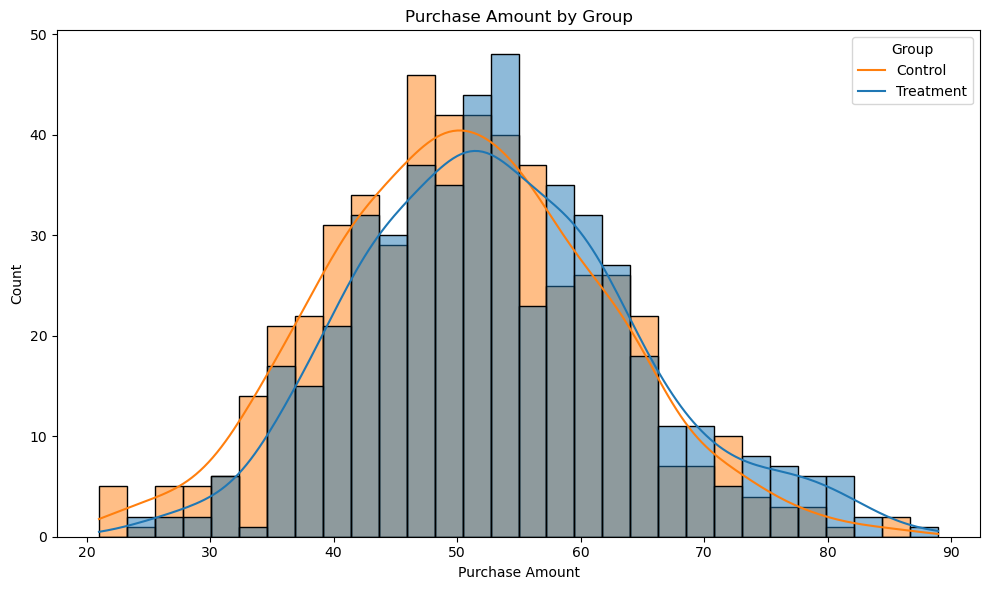

In [52]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(df, x="purchase_amount", hue="group", kde=True, bins=30)
plt.title("Purchase Amount by Group")
plt.xlabel("Purchase Amount")
plt.ylabel("Count")
plt.legend(title="Group", labels=["Control", "Treatment"])
plt.tight_layout()
plt.show()



In [53]:
# Chi-Square Test: Test independence between device and converted.

# Create a contingency table
contingency_table = pd.crosstab(df["device"], df["converted"])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("The relationship between device and conversion is statistically significant.")
else:
    print("No statistically significant relationship between device and conversion.")

Chi-Square Statistic: 4.05, p-value: 0.1322
No statistically significant relationship between device and conversion.


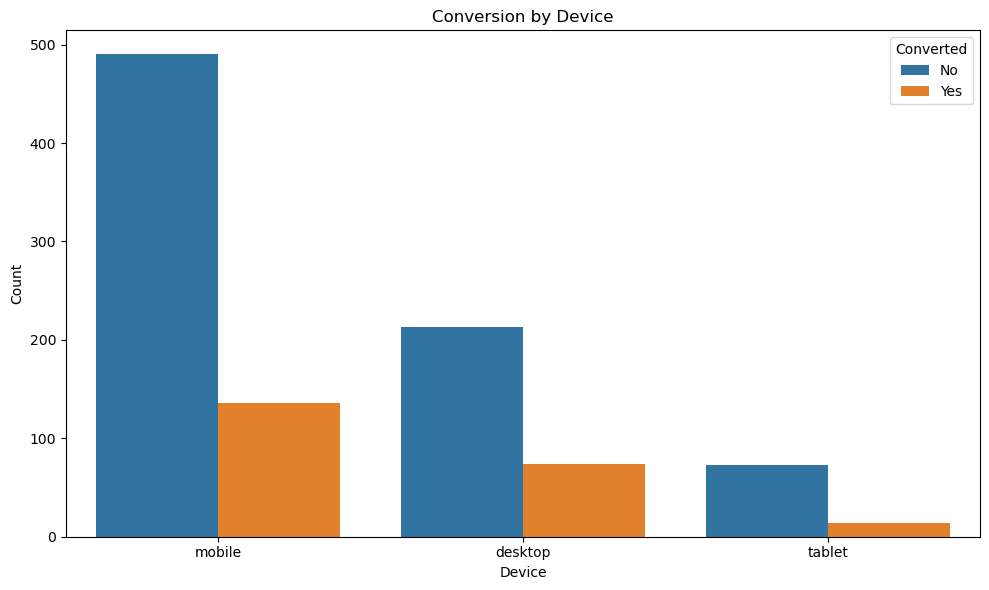

In [54]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="device", hue="converted")
plt.title("Conversion by Device")
plt.xlabel("Device")
plt.ylabel("Count")
plt.legend(title="Converted", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

In [55]:
# ANOVA:Analyze differences in purchase_amount across customer_segment.

# Group data by customer_segment
low = df[df["customer_segment"] == "low"]["purchase_amount"]
medium = df[df["customer_segment"] == "medium"]["purchase_amount"]
high = df[df["customer_segment"] == "high"]["purchase_amount"]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("The difference in purchase amount across segments is statistically significant.")
else:
    print("No statistically significant difference across segments.")

F-statistic: 2.85, p-value: 0.0582
No statistically significant difference across segments.


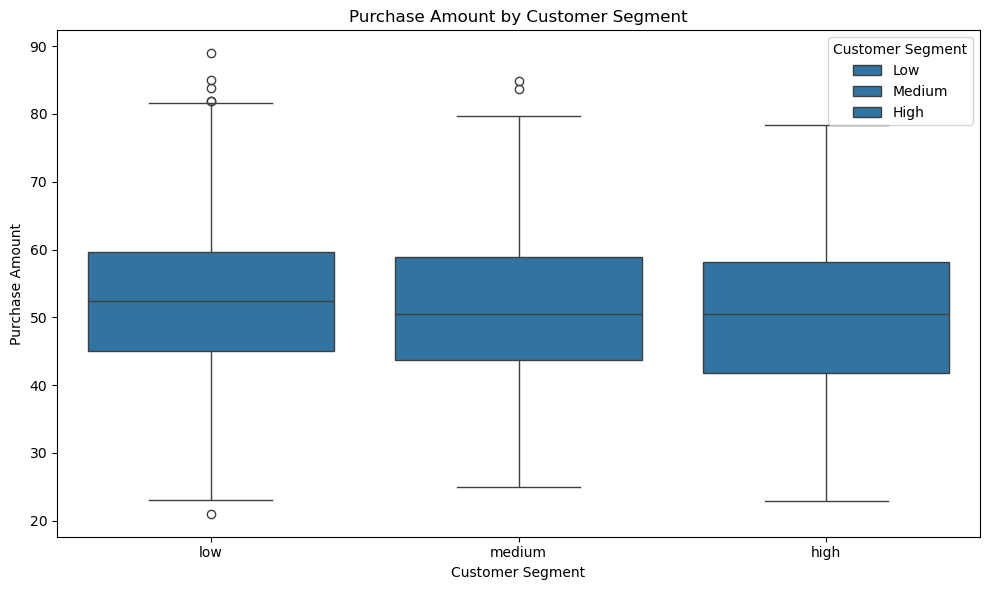

In [56]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="customer_segment", y="purchase_amount")
plt.title("Purchase Amount by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Purchase Amount")
plt.legend(title="Customer Segment", labels=["Low", "Medium", "High"])
plt.tight_layout()
plt.show()

In [57]:
# ANOVA: Compare pages_viewed across all groups

# Group data by source
organic = df[df["source"] == "organic"]["pages_viewed"]
paid = df[df["source"] == "paid"]["pages_viewed"]
referral = df[df["source"] == "referral"]["pages_viewed"]
direct = df[df["source"] == "direct"]["pages_viewed"]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(organic, paid, referral, direct)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("The difference in pages viewed across sources is statistically significant.")
else:
    print("No statistically significant difference across sources.")

F-statistic: 0.57, p-value: 0.6366
No statistically significant difference across sources.


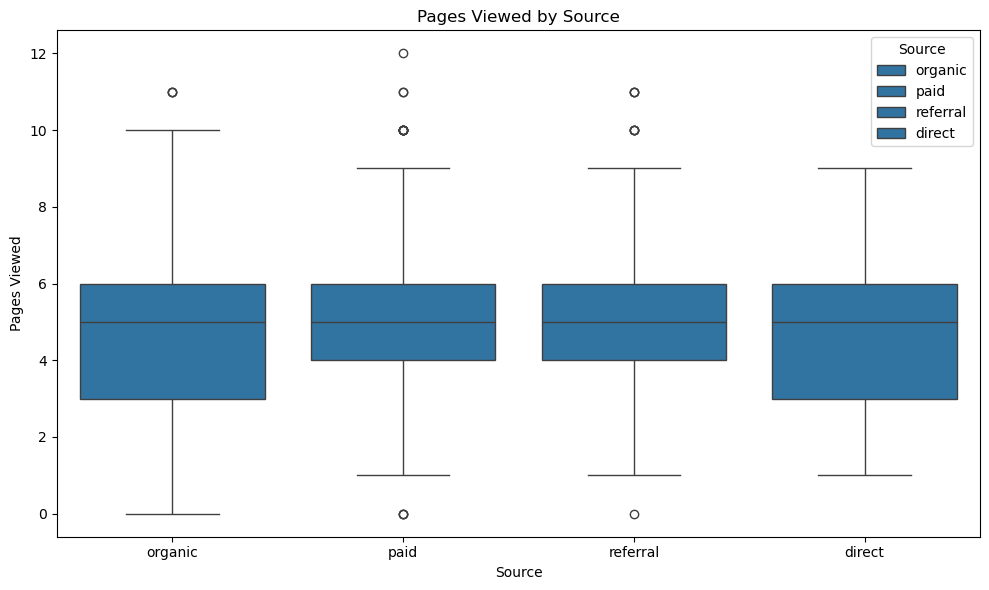

In [58]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="source", y="pages_viewed")
plt.title("Pages Viewed by Source")
plt.xlabel("Source")
plt.ylabel("Pages Viewed")
plt.legend(title="Source", labels=["organic", "paid", "referral", "direct"])
plt.tight_layout()
plt.show()

In [61]:
# Bayesian Analysis: Model the relationship between ad_spend and converted using Bayesian regression.

# Fit a Bayesian regression model
model = ols("converted ~ ad_spend", data=df).fit()
summary = model.summary()
print(summary)

if "Bayesian" in summary.as_text():
    print("Bayesian regression model successfully fit.")
else:
    print("Error fitting Bayesian regression model.")
    



                            OLS Regression Results                            
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0009061
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.976
Time:                        16:08:11   Log-Likelihood:                -544.08
No. Observations:                1000   AIC:                             1092.
Df Residuals:                     998   BIC:                             1102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2231      0.031      7.111      0.0

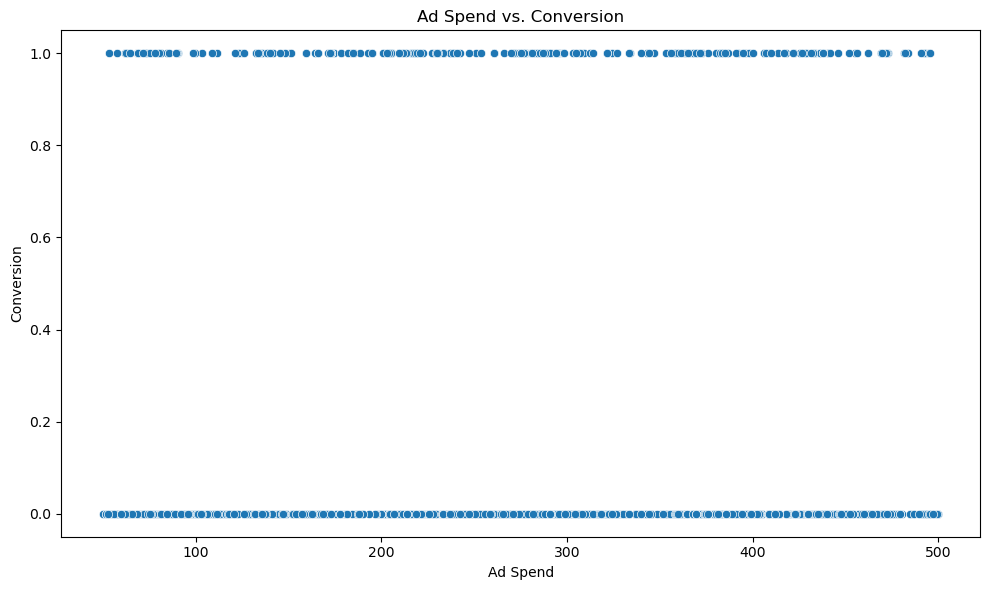

In [60]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ad_spend", y="converted")
plt.title("Ad Spend vs. Conversion")
plt.xlabel("Ad Spend")
plt.ylabel("Conversion")
plt.tight_layout()
plt.show()

In [65]:
# A/B Testing: Evaluate the impact of group on converted.

# Convert the 'group' column to numeric values
df['group_numeric'] = df['group'].map({'control': 0, 'treatment': 1})

# A/B Testing: Evaluate the impact of group on converted
correlation = df["group_numeric"].corr(df["converted"])
print(f"Correlation between group and converted: {correlation:.2f}")



    


Correlation between group and converted: 0.18


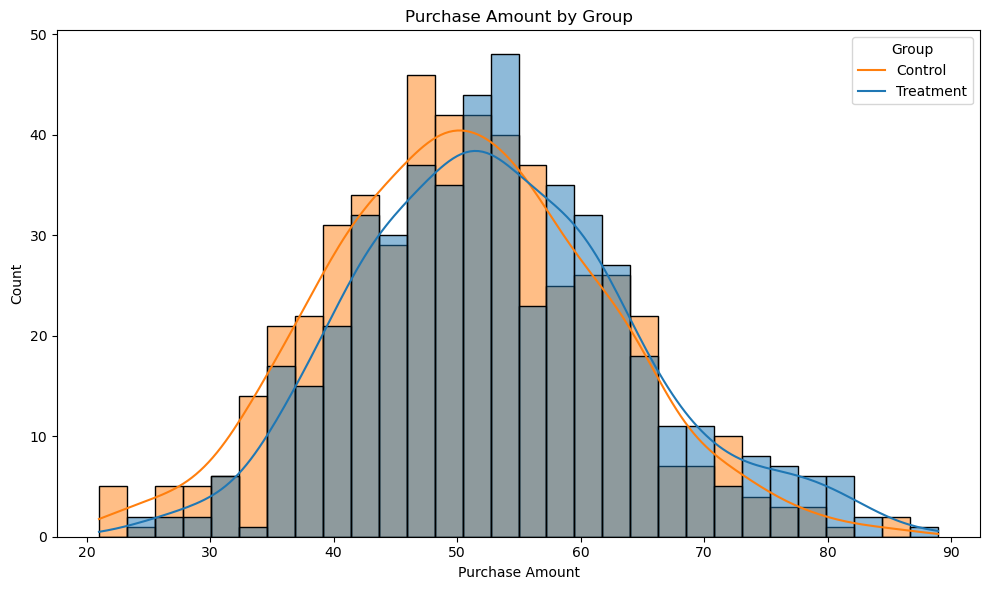

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.960
Date:                Wed, 01 Jan 2025   Prob (F-statistic):            0.00202
Time:                        16:16:31   Log-Likelihood:                -3838.2
No. Observations:                1000   AIC:                             7684.
Df Residuals:                     996   BIC:                             7704.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             48.4586      2

In [66]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(df, x="purchase_amount", hue="group", kde=True, bins=30)

# Customize the legend
plt.title("Purchase Amount by Group")
plt.xlabel("Purchase Amount")
plt.ylabel("Count")
plt.legend(title="Group", labels=["Control", "Treatment"])
plt.tight_layout()
plt.show()

# Example regression analysis using statsmodels
model = ols('purchase_amount ~ group + session_duration + pages_viewed', data=df).fit()
print(model.summary())